In [8]:
!pip install bs4
!pip install requests
!pip install lxml
!pip install html5lib

In [9]:
from bs4 import BeautifulSoup
import requests

In [10]:
page=requests.get("https://www.theplasticsexchange.com/default.aspx")
page

<Response [200]>

In [11]:
page.content

b'\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head id="ctl00_Head1">\r\n    <!-- Mimic Internet Explorer 7 -->\r\n    <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7" /><title>\r\n\tThe Plastics Exchange: Commodity Plastic Resin, Buy Resin, Sell Resin, Plastic\r\n</title><meta name="description" content="The spot market for buying and selling commodity grade plastic resins and a trusted source of market intelligence." /><meta name="keywords" content="Polyethylene, Monomer, Polyethylene, Widespec, Offgrade, Feedstock, Polystyrene, Plastic, Resin, Polypropylene, chemicals, plastics, detergents, transaction, fulfillment, exchange, commodity, supplier, buy, sell, trade, marketplace, petrochemical, negotiation" /><meta name="resource-type" content="document" /><meta name="GOOGLEBOT" content="NOARCHIVE" /><meta name="robots" content="noarchive" /><met

In [12]:
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head id="ctl00_Head1">
<!-- Mimic Internet Explorer 7 -->
<meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible"/><title>
	The Plastics Exchange: Commodity Plastic Resin, Buy Resin, Sell Resin, Plastic
</title><meta content="The spot market for buying and selling commodity grade plastic resins and a trusted source of market intelligence." name="description"/><meta content="Polyethylene, Monomer, Polyethylene, Widespec, Offgrade, Feedstock, Polystyrene, Plastic, Resin, Polypropylene, chemicals, plastics, detergents, transaction, fulfillment, exchange, commodity, supplier, buy, sell, trade, marketplace, petrochemical, negotiation" name="keywords"/><meta content="document" name="resource-type"/><meta content="NOARCHIVE" name="GOOGLEBOT"/><meta content="noarchive" name="robots"/><meta content="Plastics Trading" name="clas

In [13]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head id="ctl00_Head1">
  <!-- Mimic Internet Explorer 7 -->
  <meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible"/>
  <title>
   The Plastics Exchange: Commodity Plastic Resin, Buy Resin, Sell Resin, Plastic
  </title>
  <meta content="The spot market for buying and selling commodity grade plastic resins and a trusted source of market intelligence." name="description"/>
  <meta content="Polyethylene, Monomer, Polyethylene, Widespec, Offgrade, Feedstock, Polystyrene, Plastic, Resin, Polypropylene, chemicals, plastics, detergents, transaction, fulfillment, exchange, commodity, supplier, buy, sell, trade, marketplace, petrochemical, negotiation" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="NOARCHIVE" name="GOOGLEBOT"/>
  <meta content="noarchive" name="robots"/>
  <meta content

In [14]:
import pandas as pd

In [15]:
table = pd.read_html("https://www.theplasticsexchange.com/default.aspx",attrs={'class':'LinkNormal WhiteLink'})[0] 
print(table)

                      0          1      2      3
0                 Resin  Total lbs    Low   High
1    PP Copolymer - Inj    1611472  0.680  1.060
2  PP Homopolymer - Inj    1729944  0.850  0.970
3            HDPE - Inj    2821888  0.650  0.850
4           LLDPE - Inj     881840  0.680  0.840
5      HDPE - Blow Mold    2506944  0.650  0.835
6            LDPE - Inj     132276  0.780  0.820
7           LDPE - Film    1543220  0.755  0.810
8          LLDPE - Film    2884760  0.670  0.780
9          HMWPE - Film     871380  0.675  0.735


In [16]:
table.to_csv('resindata.csv')

In [17]:
df=pd.read_csv('resindata.csv')

In [18]:
df

,Unnamed: 0,0,1,2,3
0,0,Resin,Total lbs,Low,High
1,1,PP Copolymer - Inj,1611472,0.680,1.060
2,2,PP Homopolymer - Inj,1729944,0.850,0.970
3,3,HDPE - Inj,2821888,0.650,0.850
4,4,LLDPE - Inj,881840,0.680,0.840
5,5,HDPE - Blow Mold,2506944,0.650,0.835
6,6,LDPE - Inj,132276,0.780,0.820
7,7,LDPE - Film,1543220,0.755,0.810
8,8,LLDPE - Film,2884760,0.670,0.780
9,9,HMWPE - Film,871380,0.675,0.735


In [19]:
df.dtypes

Unnamed: 0     int64
0             object
1             object
2             object
3             object
dtype: object

In [20]:
df.shape

(10, 5)

In [21]:
df.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
dtype: int64

In [22]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

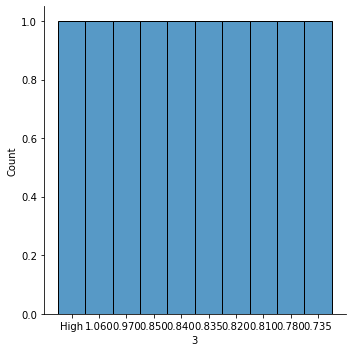

In [23]:
sns.displot(df['3'])

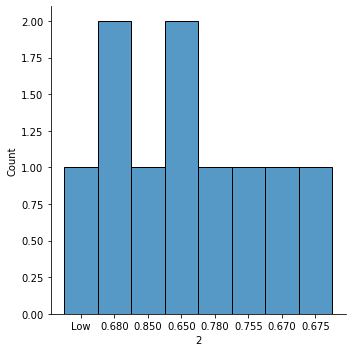

In [24]:
sns.displot(df['2'])

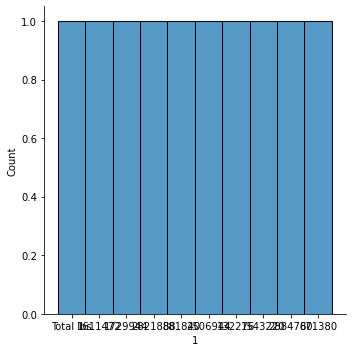

In [25]:
sns.displot(df['1'])

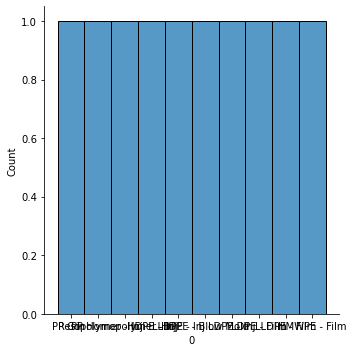

In [26]:
sns.displot(df['0'])

In [27]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3'], dtype='object')

In [28]:
df.iloc[:,0]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64

In [29]:
lencode=LabelEncoder()
df['0']=lencode.fit_transform(df['0'])
df['1']=lencode.fit_transform(df['1'])
df['2']=lencode.fit_transform(df['2'])
df['3']=lencode.fit_transform(df['3'])
df

,Unnamed: 0,0,1,2,3
0,0,9,9,7,9
1,1,7,2,3,8
2,2,8,3,6,7
3,3,1,5,0,6
4,4,6,8,3,5
5,5,0,4,0,4
6,6,4,0,5,3
7,7,3,1,4,2
8,8,5,6,1,1
9,9,2,7,2,0


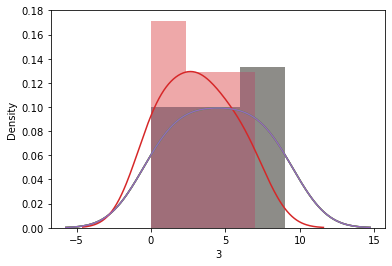

In [30]:
for i in df.columns:
    sns.distplot(df[i])

<AxesSubplot:xlabel='0', ylabel='1'>

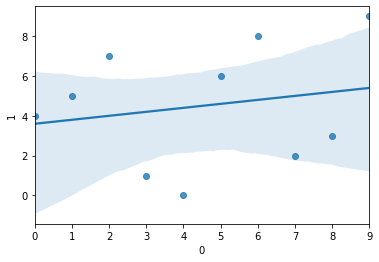

In [31]:
sns.regplot(x="0",y="1",data=df)

<AxesSubplot:xlabel='0', ylabel='2'>

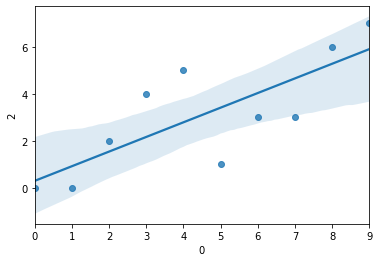

In [32]:
sns.regplot(x="0",y="2",data=df)

<AxesSubplot:xlabel='0', ylabel='3'>

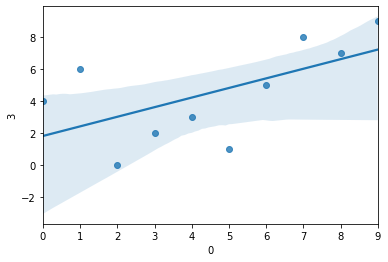

In [33]:
sns.regplot(x="0",y="3",data=df)

<AxesSubplot:xlabel='1', ylabel='3'>

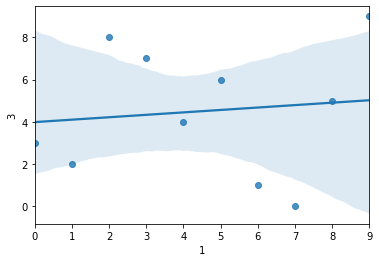

In [34]:
sns.regplot(x="1",y="3",data=df)

<AxesSubplot:xlabel='1', ylabel='2'>

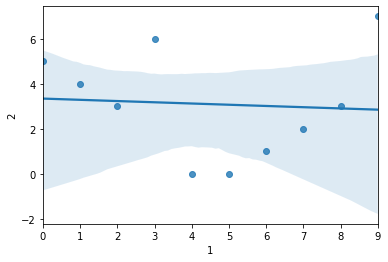

In [35]:
sns.regplot(x="1",y="2",data=df)

<AxesSubplot:xlabel='0', ylabel='2'>

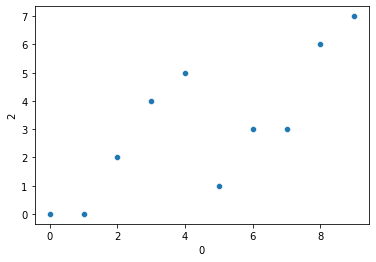

In [36]:
sns.scatterplot(x="0",y="2",data=df)

<AxesSubplot:xlabel='1', ylabel='2'>

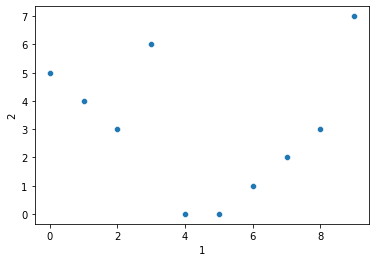

In [37]:
sns.scatterplot(x="1",y="2",data=df)

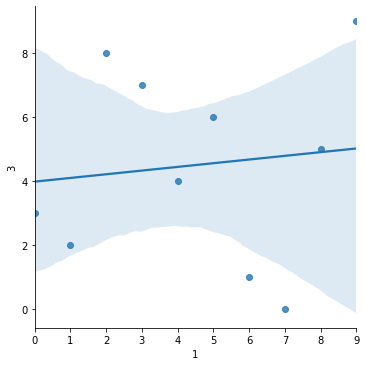

In [38]:
sns.lmplot(x='1',y='3',data=df)

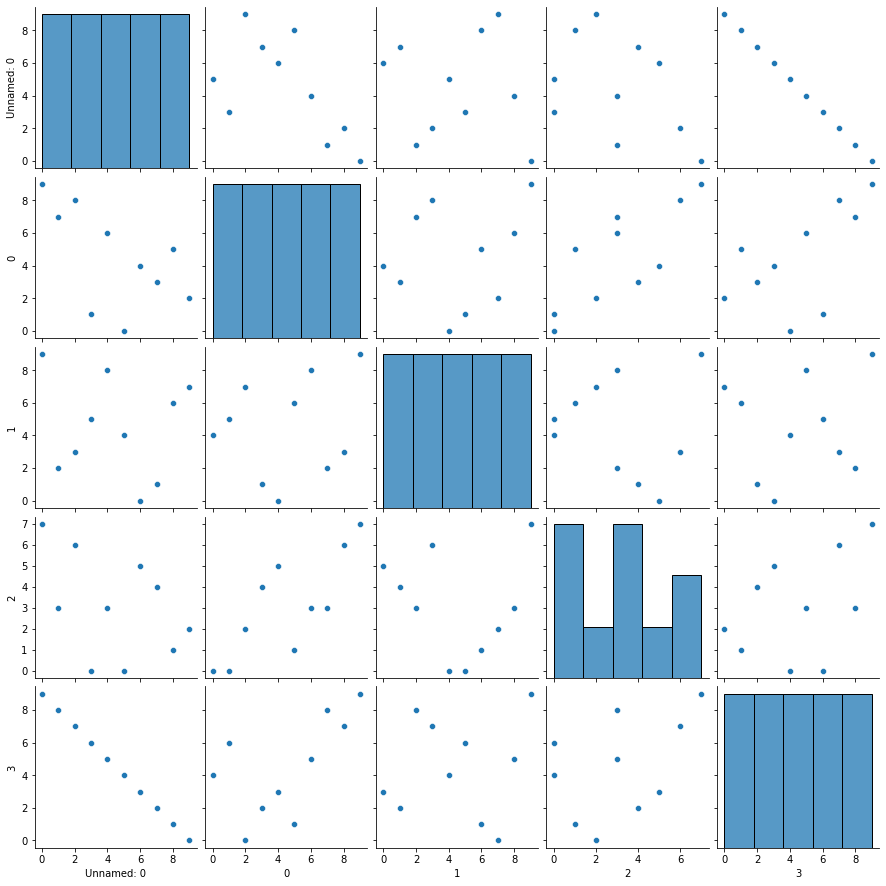

In [39]:
sns.pairplot(df)

In [40]:
df.describe()

,Unnamed: 0,0,1,2,3
count,10.00000,10.00000,10.00000,10.000000,10.00000
mean,4.50000,4.50000,4.50000,3.100000,4.50000
std,3.02765,3.02765,3.02765,2.424413,3.02765
min,0.00000,0.00000,0.00000,0.000000,0.00000
25%,2.25000,2.25000,2.25000,1.250000,2.25000
50%,4.50000,4.50000,4.50000,3.000000,4.50000
75%,6.75000,6.75000,6.75000,4.750000,6.75000
max,9.00000,9.00000,9.00000,7.000000,9.00000


In [41]:
df.skew()

Unnamed: 0    0.000000
0             0.000000
1             0.000000
2             0.205846
3             0.000000
dtype: float64

In [42]:
from scipy.stats import zscore

In [43]:
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([], dtype=int64), array([], dtype=int64))


In [44]:
dfnew=df[(dfzscore<3).all(axis=1)]

In [45]:
print('dfnew.shape=',dfnew.shape)

dfnew.shape= (10, 5)


In [46]:
df=dfnew

In [47]:
df.corr()

,Unnamed: 0,0,1,2,3
Unnamed: 0,1.000000,-0.600000,-0.115152,-0.431410,-1.000000
0,-0.600000,1.000000,0.200000,0.779565,0.600000
1,-0.115152,0.200000,1.000000,-0.068117,0.115152
2,-0.431410,0.779565,-0.068117,1.000000,0.431410
3,-1.000000,0.600000,0.115152,0.431410,1.000000


<AxesSubplot:>

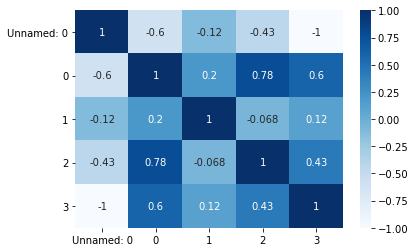

In [48]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
x=df.iloc[:,0:-1]
x

,Unnamed: 0,0,1,2
0,0,9,9,7
1,1,7,2,3
2,2,8,3,6
3,3,1,5,0
4,4,6,8,3
5,5,0,4,0
6,6,4,0,5
7,7,3,1,4
8,8,5,6,1
9,9,2,7,2


In [51]:
y=df.iloc[:,-1]
y

0    9
1    8
2    7
3    6
4    5
5    4
6    3
7    2
8    1
9    0
Name: 3, dtype: int32

In [52]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [53]:
vif_calc()

   VIF Factor    features
0    2.020151  Unnamed: 0
1   11.131575           0
2    3.658956           1
3    8.216416           2


<AxesSubplot:>

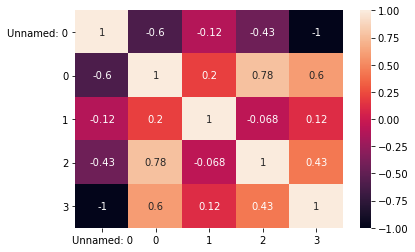

In [54]:
sns.heatmap(df.corr(),annot=True)

In [55]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.5666989 ,  1.5666989 ,  1.5666989 ,  1.69565217],
       [-1.21854359,  0.87038828, -0.87038828, -0.04347826],
       [-0.87038828,  1.21854359, -0.52223297,  1.26086957],
       [-0.52223297, -1.21854359,  0.17407766, -1.34782609],
       [-0.17407766,  0.52223297,  1.21854359, -0.04347826],
       [ 0.17407766, -1.5666989 , -0.17407766, -1.34782609],
       [ 0.52223297, -0.17407766, -1.5666989 ,  0.82608696],
       [ 0.87038828, -0.52223297, -1.21854359,  0.39130435],
       [ 1.21854359,  0.17407766,  0.52223297, -0.91304348],
       [ 1.5666989 , -0.87038828,  0.87038828, -0.47826087]])

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [57]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([-2.87228132e+00,  4.47668233e-17, -2.69524192e-16,  1.08926465e-15])

In [58]:
lr.intercept_

4.5

In [59]:
lr.score(xtrain,ytrain)

1.0

In [60]:
pred=lr.predict(xtest)
pred

array([5., 9., 7.])

In [61]:
print('Predicted values',pred)

Predicted values [5. 9. 7.]


In [62]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,5.0
1,9.0
2,7.0


In [63]:
lr.score(xtest,ytest)

1.0

In [64]:
print('Mean absolute error::',mean_absolute_error(ytest,pred)) 
print('Mean squared error::',mean_squared_error(ytest,pred))
print('Root mean square::',np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 2.9605947323337506e-16
Mean squared error:: 2.629536350736706e-31
Root mean square:: 5.127900497022837e-16


In [65]:
print('R2 score::',r2_score(ytest,pred))

R2 score:: 1.0


In [66]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)

0.9999999982243671

In [67]:
ls.coef_

array([-2.87216029,  0.        , -0.        , -0.        ])

In [68]:
rd=Ridge(alpha=0.0001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)

0.9999999991621354

In [69]:
rd.coef_

array([-2.87214210e+00,  8.34218033e-05, -1.67129208e-04, -1.98149946e-04])

In [70]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(xtrain,ytrain)
enrpred=enr.predict(xtest)
print(enr.score(xtrain,ytrain))
enr.coef_

0.9999999933461938


array([-2.87204073e+00,  0.00000000e+00, -2.14131742e-05, -0.00000000e+00])

In [71]:
from sklearn.svm import SVR

In [72]:
svr = SVR(kernel = 'linear')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)
svr = SVR(kernel = 'poly')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)
svr = SVR(kernel = 'rbf')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)

In [73]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(xtrain,ytrain)
    print(sv.score(xtrain,ytrain))

0.9988067031102871
0.6535944910718687
0.5457718679198387


In [74]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(ytrain)

print(utils.multiclass.type_of_target(ytrain))

print(utils.multiclass.type_of_target(ytrain.astype('int')))

print(utils.multiclass.type_of_target(encoded))

multiclass
multiclass
multiclass


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9999998473936784

In [76]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.999999868325188

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [78]:
print('Mean absolute error::',mean_absolute_error(ytest,pred)) 
print('Mean squared error::',mean_squared_error(ytest,pred))
print('Root mean square::',np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 2.9605947323337506e-16
Mean squared error:: 2.629536350736706e-31
Root mean square:: 5.127900497022837e-16


In [85]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
!pip install mapie

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

regressor = LinearRegression()
X, y = make_regression(n_samples=10, n_features=1, noise=20, random_state=59)


In [89]:
!pip install tensorflow

In [90]:
import tensorflow as tf

In [91]:
from tensorflow import keras
from tensorflow.keras import layers

In [92]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(None, 28)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 24,714
Trainable params: 24,586
Non-trainable params: 128
_________________________________________________________________
None


In [93]:
mnist = keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain, xtest = xtrain/255.0, xtest/255.0
x_validate, y_validate = xtest[:-10], ytest[:-10]
xtest, ytest = xtest[-10:], ytest[-10:]

11490434/11490434 [==============================] - 38s 3us/step


In [94]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

In [97]:
model.fit(
    xtrain, ytrain, validation_data=(x_validate, y_validate), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 23s 21ms/step - loss: 0.9423 - accuracy: 0.6991 - val_loss: 0.5228 - val_accuracy: 0.8393
Epoch 2/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3934 - accuracy: 0.8810 - val_loss: 0.2679 - val_accuracy: 0.9169
Epoch 3/10
938/938 [==============================] - 20s 22ms/step - loss: 0.2547 - accuracy: 0.9238 - val_loss: 0.2753 - val_accuracy: 0.9117
Epoch 4/10
938/938 [==============================] - 21s 22ms/step - loss: 0.2002 - accuracy: 0.9395 - val_loss: 0.1565 - val_accuracy: 0.9524
Epoch 5/10
938/938 [==============================] - 21s 22ms/step - loss: 0.1682 - accuracy: 0.9499 - val_loss: 0.2623 - val_accuracy: 0.9147
Epoch 6/10
938/938 [==============================] - 21s 23ms/step - loss: 0.1482 - accuracy: 0.9548 - val_loss: 0.1664 - val_accuracy: 0.9454
Epoch 7/10
938/938 [==============================] - 21s 22ms/step - loss: 0.1326 - accuracy: 0.9596 - val_loss: 0.1596 - val_accuracy:

In [98]:
for i in range(10):
    result = tf.argmax(model.predict(tf.expand_dims(xtest[i], 0)), axis=1)
    print(result.numpy(), ytest[i])

1/1 [==============================] - 1s 796ms/step
[7] 7
1/1 [==============================] - 0s 26ms/step
[8] 8
1/1 [==============================] - 0s 25ms/step
[9] 9
1/1 [==============================] - 0s 30ms/step
[0] 0
1/1 [==============================] - 0s 33ms/step
[1] 1
1/1 [==============================] - 0s 37ms/step
[2] 2
1/1 [==============================] - 0s 33ms/step
[3] 3
1/1 [==============================] - 0s 27ms/step
[4] 4
1/1 [==============================] - 0s 30ms/step
[5] 5
1/1 [==============================] - 0s 28ms/step
[6] 6
